In [1]:
# conda install -c anaconda nltk

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import nltk
nltk.download("punkt")
# from nltk.stem.porter import PorterStemmer


df = pd.read_csv('MM Data - PartnersWithLatLong.csv')
df.sample(1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lilyx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Submitted on,Email address,Phone,Name,Last name,City,Stateprovince,Country,Date Last Contacted,By,Outcome,I am interested in,Comment,Unnamed: 13,ZIP,Full Address,Timezone,Donations,Donation Date,Donation Source,Source,Company,Subscribed,Emails sent,Opened,Clicked,LatLong,Lat,Long
202,02/24/2018 8:39:16,milastephaniejoseph@gmail.com,NaN,Stephanie,Joseph,Mattapan,ma,NaN,NaN,NaN,NaN,"Volunteering, Donating, Partnering, Joining th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-24 16:42:17,0.0,0.0,0.0,"(34.220389, 70.3800314, 0.0)",34.220389,70.380031


In [3]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

df['Comment'] = df['Comment'].astype(str)
# Remove extra white space
df['Comment_Clean'] = df['Comment'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
df['Comment_Clean'] = df['Comment_Clean'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
df['Comment_Clean'] = df['Comment_Clean'].str.lower()

# Lemmatize
df['Comment_Clean'] = df['Comment_Clean'].map(lambda x: lemmatize(x))

In [4]:
df.head(4)

,Submitted on,Email address,Phone,Name,Last name,City,Stateprovince,Country,Date Last Contacted,By,Outcome,I am interested in,Comment,Unnamed: 13,ZIP,Full Address,Timezone,Donations,Donation Date,Donation Source,Source,Company,Subscribed,Emails sent,Opened,Clicked,LatLong,Lat,Long,Comment_Clean
0,2016-04-26 16:17:17,jeff@charitees.org,NaN,NaN,NaN,Boca Raton,FL,USA,NaN,NaN,NaN,Partnering,Hi Mark... Thanks for this great project.Would...,1.0,NaN,Boca Raton PA USA,America/New_York,NaN,NaN,NaN,NaN,NaN,2017-12-07 7:54:11,2.0,0.0,0.0,NaN,NaN,NaN,hi mark thanks for this great project would li...
1,2018-02-06 7:56:04,patti.harris@camdencounty.com,NaN,Patti,Harris,Camden,New Jersey,USA,NaN,NaN,NaN,Partnering,our Homelessness Initiative Team would love to...,1.0,NaN,NaN,America/New_York,NaN,NaN,NaN,NaN,NaN,2018-02-06 16:09:12,0.0,0.0,0.0,"(34.220389, 70.3800314, 0.0)",34.220389,70.380031,our homelessness initiative team would love to...
2,02/26/2017 18:48:58,nicolezaborsky@charter.net,NaN,Nicole,Zaborsky,NaN,NaN,NaN,NaN,NaN,NaN,Partnering,I am a board member of the South Lake Tahoe Co...,1.0,NaN,"South Lake Tahoe, CA",NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26 16:55:49,0.0,0.0,0.0,"(38.9332411, -119.9843482, 0.0)",38.933241,-119.984348,i am a board member of the south lake tahoe co...
3,03/30/2017 10:22:44,jlbaker@nnva.gov,NaN,Jill,Baker,NaN,NaN,NaN,NaN,NaN,NaN,Partnering,I oversee our Homeless program in a local Dept...,1.0,NaN,"Newport News, VA",NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26 16:55:49,0.0,0.0,0.0,"(36.9786449, -76.4321089, 0.0)",36.978645,-76.432109,i oversee our homeless program in a local dept...


In [5]:
player = 'laura.close@rocketmail.com'
print('Original Text: \n{}\n'.format(list(df[df['Email address'] == player]['Comment'])))
print('After Cleaning: \n{}'.format(list(df[df['Email address'] == player]['Comment_Clean'])))

Original Text: 
["Hi! I saw your presentation at Impact Hub last Thursday and am very interested in partnering Up! I currently work as a case manager in supportive housing for formerly homeless adults in SRO's  in San Francisco. I have some client's who may be interested i"]

After Cleaning: 
['hi i saw your presentation at impact hub last thursday and am very interested in partnering up i currently work a a case manager in supportive housing for formerly homeless adult in sro s in san francisco i have some client s who may be interested i']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['nan','love','like', 'would like', 'i','we','am', 'be', 'in','have', 'would','wa','one','year','hi','get','ha','hello','also','see','need','thank','saw','please','people','county','city','could','area','miracle','message','non','know','one','great','really','amazing','may','let','currently','many','someone','interested','name','way','street','homeless','homelessness','phone','number','found','thanks'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(df['Comment_Clean'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (689, 406)


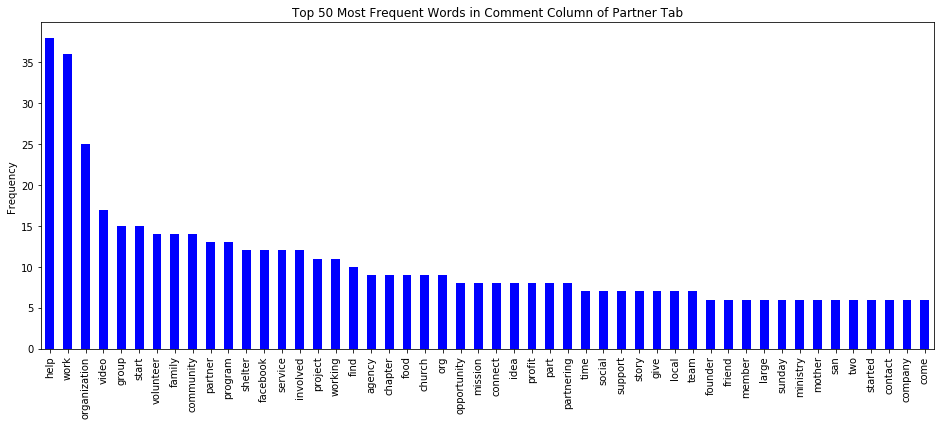

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Comment Column of Partner Tab")
plt.ylabel("Frequency")
plt.show()

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 30
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=30, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=10, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\lilyx\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.075976  0.089982       1        1  6.887996
0      0.098880  0.062062       2        1  6.265584
19    -0.065538 -0.022155       3        1  6.194039
16     0.076053  0.053039       4        1  6.109546
9     -0.068460 -0.138425       5        1  5.444380
20    -0.194424 -0.031105       6        1  4.657689
5      0.042202 -0.121517       7        1  4.576012
6      0.059234 -0.070987       8        1  4.422064
25     0.123946 -0.104966       9        1  4.085922
2     -0.015532 -0.038519      10        1  4.081616
12    -0.074611  0.021668      11        1  3.925436
7     -0.127105 -0.048590      12        1  3.621130
1      0.167039  0.013488      13        1  3.559644
28     0.152415 -0.026744      14        1  3.523403
15     0.000968 -0.061185      15        1  3.520481
8      0.070445 -0.114374      16        1  3.161638
29     0.011476 -0.032347      17        1  3.047910
14    -0.047258  0.164248      18        1  2.911597
26    -0.082677  0.016314      19        1  2.588608
3      0.006263  0.194111      20        1  2.583513
18     0.000501  0.059834      21        1  2.341268
17     0.062109  0.057022      22        1  2.244407
24    -0.039684 -0.015424      23        1  2.206758
4     -0.028695  0.057108      24        1  2.030222
27     0.006858  0.010817      25        1  1.809163
22    -0.125907  0.014054      26        1  1.800535
21    -0.029597 -0.056531      27        1  1.238910
13    -0.011477  0.037709      28        1  0.595806
10    -0.021701  0.015706      29        1  0.282361
23    -0.021701  0.015706      30        1  0.282361, topic_info=    Category       Freq                 Term      Total  loglift  logprob
155  Default  31.000000                 help  31.000000  30.0000  30.0000
398  Default  29.000000                 work  29.000000  29.0000  29.0000
148  Default  12.000000                group  12.000000  28.0000  28.0000
381  Default  14.000000                video  14.000000  27.0000  27.0000
110  Default  11.000000               family  11.000000  26.0000  26.0000
286  Default  10.000000              program  10.000000  25.0000  25.0000
322  Default  10.000000              shelter  10.000000  24.0000  24.0000
68   Default  12.000000            community  12.000000  23.0000  23.0000
199  Default   3.000000                 life   3.000000  22.0000  22.0000
118  Default   8.000000                 find   8.000000  21.0000  21.0000
383  Default  11.000000            volunteer  11.000000  20.0000  20.0000
336  Default  12.000000                start  12.000000  19.0000  19.0000
5    Default   8.000000               agency   8.000000  18.0000  18.0000
315  Default  10.000000              service  10.000000  17.0000  17.0000
180  Default  10.000000             involved  10.000000  16.0000  16.0000
287  Default   9.000000              project   9.000000  15.0000  15.0000
109  Default  10.000000             facebook  10.000000  14.0000  14.0000
71   Default   7.000000              connect   7.000000  13.0000  13.0000
57   Default   8.000000              chapter   8.000000  12.0000  12.0000
265  Default  11.000000              partner  11.000000  11.0000  11.0000
40   Default   4.000000                 call   4.000000  10.0000  10.0000
253  Default  21.000000         organization  21.000000   9.0000   9.0000
252  Default   7.000000                  org   7.000000   8.0000   8.0000
256  Default   5.000000             outreach   5.000000   7.0000   7.0000
59   Default   7.000000               church   7.000000   6.0000   6.0000
268  Default   3.000000               pastor   3.000000   5.0000   5.0000
75   Default   5.000000              contact   5.000000   4.0000   4.0000
229  Default   7.000000              mission   7.000000   3.0000   3.0000
401  Default   9.000000              working   9.000000   2.0000   2.0000
124  Default   8.000000                 f

In [62]:
food = ['package','care package','pantry','feeding','food','dinner']
shelter = ['shelter','place','living','housing']
uniting = ['find','reuniting','together','connect','look','bridge', 'family']
medical = ['emergency']
socialreligious = ['outreach','mission help']
marketing = ['spread','designer']
job = ['job']
donor = ['give back', 'donate', 'give']
moreactionneeded = ['partner','chapter','work','agency','organization']
time = ['volunteer','volunteering','time', 'assist','assisting']

label = []


for row in df['Comment_Clean']:
    if any(word in row for word in food):
        label.append('food')
    elif any(word in row for word in shelter):
        label.append('shelter')
    elif any(word in row for word in uniting):
        label.append('uniting')
    elif any(word in row for word in medical):
        label.append('medical')
    elif any(word in row for word in socialreligious):
        label.append('socialreligious')
    elif any(word in row for word in marketing):
        label.append('marketing')
    elif any(word in row for word in job):
        label.append('job')
    elif any(word in row for word in donor):
        label.append('donor')
    elif any(word in row for word in moreactionneeded):
        label.append('moreactionneeded')
    elif any(word in row for word in time):
        label.append('time')
    else:
        label.append('other')

df['newlabel'] = label
df.head(5)

,Submitted on,Email address,Phone,Name,Last name,City,Stateprovince,Country,Date Last Contacted,By,Outcome,I am interested in,Comment,Unnamed: 13,ZIP,Full Address,Timezone,Donations,Donation Date,Donation Source,Source,Company,Subscribed,Emails sent,Opened,Clicked,LatLong,Lat,Long,Comment_Clean,newlabel
0,2016-04-26 16:17:17,jeff@charitees.org,NaN,NaN,NaN,Boca Raton,FL,USA,NaN,NaN,NaN,Partnering,Hi Mark... Thanks for this great project.Would...,1.0,NaN,Boca Raton PA USA,America/New_York,NaN,NaN,NaN,NaN,NaN,2017-12-07 7:54:11,2.0,0.0,0.0,NaN,NaN,NaN,hi mark thanks for this great project would li...,shelter
1,2018-02-06 7:56:04,patti.harris@camdencounty.com,NaN,Patti,Harris,Camden,New Jersey,USA,NaN,NaN,NaN,Partnering,our Homelessness Initiative Team would love to...,1.0,NaN,NaN,America/New_York,NaN,NaN,NaN,NaN,NaN,2018-02-06 16:09:12,0.0,0.0,0.0,"(34.220389, 70.3800314, 0.0)",34.220389,70.380031,our homelessness initiative team would love to...,other
2,02/26/2017 18:48:58,nicolezaborsky@charter.net,NaN,Nicole,Zaborsky,NaN,NaN,NaN,NaN,NaN,NaN,Partnering,I am a board member of the South Lake Tahoe Co...,1.0,NaN,"South Lake Tahoe, CA",NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26 16:55:49,0.0,0.0,0.0,"(38.9332411, -119.9843482, 0.0)",38.933241,-119.984348,i am a board member of the south lake tahoe co...,uniting
3,03/30/2017 10:22:44,jlbaker@nnva.gov,NaN,Jill,Baker,NaN,NaN,NaN,NaN,NaN,NaN,Partnering,I oversee our Homeless program in a local Dept...,1.0,NaN,"Newport News, VA",NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26 16:55:49,0.0,0.0,0.0,"(36.9786449, -76.4321089, 0.0)",36.978645,-76.432109,i oversee our homeless program in a local dept...,uniting
4,01/27/2018 15:51:52,laura.close@rocketmail.com,NaN,Laura,Close,San Francisco,Ca,USA,NaN,NaN,NaN,"Partnering, Something else",Hi! I saw your presentation at Impact Hub last...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-28 0:06:46,0.0,0.0,0.0,"(34.220389, 70.3800314, 0.0)",34.220389,70.380031,hi i saw your presentation at impact hub last ...,shelter


In [29]:
# tf_vectorizer = CountVectorizer(lowercase=True, stop_words=stop_words)
# X = tf_vectorizer.fit_transform(df['Comment_Clean'])

# tf_df = pd.DataFrame(data = X.toarray(), columns = tf_vectorizer.get_feature_names())
# print(f'Number of sentences: {tf_df.shape[0]}\nNumber of tokens: {tf_df.shape[1]}\n')
# tf_df

In [24]:
# df1 = df[df.columns.difference(['find','package','care package','shelter','reuniting','place','living','pantry','feeding','food','outreach','mission help','emergency','spread','together','connect','look','housing','dinner'])]
# print('Shape of New DataFrame: {}\n'.format(df1.shape))
# print('Features to Include in Model: \n{}'.format(list(df1.columns)))b

Shape of New DataFrame: (689, 30)

Features to Include in Model: 
['By', 'City', 'Clicked', 'Comment', 'Comment_Clean', 'Company', 'Country', 'Date Last Contacted ', 'Donation Date', 'Donation Source', 'Donations', 'Email address', 'Emails sent', 'Full Address', 'I am interested in', 'Last name', 'Lat', 'LatLong', 'Long', 'Name', 'Opened', 'Outcome', 'Phone', 'Source', 'Stateprovince', 'Submitted on', 'Subscribed', 'Timezone', 'Unnamed: 13', 'ZIP']
